hieronder wil ik een spel maken waarbij je een lijst met volgordes hebt.
het is bijvoorbeeld een lijst van 1 tot 10. allemaal los van elkaar.
daarnaast wil ik dat er steeds een 1 wordt toegevoed.
dan wordt de stap:
1 = 1
1+1 =2
1 + 2 = 1,2
1+1 = 2 en 2+2 is 3
en zo voort.

ik wil dat je kan aangeven hoe vaak je mag spelen. kunnen bijvoorbeeld levens zijn. en dan wil ik alle elementen van een lijst los zien.

stappenplan:
* generate a bit-lijst. dus 1/2/4/8 enz tot 10 elementen
* zip die lijst met waarden 1 tot en met 10. dus weer 10 elementen
* en maak dan aan de hand een functie een lijst van de unieke elementen.


In [58]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [59]:
waardenlijst = [
    "Paster the walls",
    "Paint",
    "Lay the floor",
    "Tidy up",
    "Clean",
    "Look for a couch",
    "Look for chairs",
    "Find a TV",
    "Search for curtains",
    "Look for paintings",
    "clean up the garden",
    "Search for garden furniture",
    "Clean up the front yard",
    "Find a desk",
]
print(waardenlijst)

['Paster the walls', 'Paint', 'Lay the floor', 'Tidy up', 'Clean', 'Look for a couch', 'Look for chairs', 'Find a TV', 'Search for curtains', 'Look for paintings', 'clean up the garden', 'Search for garden furniture', 'Clean up the front yard', 'Find a desk']


In [60]:
def get_my_output(levens):
    bin_string = bin(levens)
    clean_string = bin_string[2:]
    turned_string = clean_string[::-1]
    list_of_elements_binary_string = list(turned_string)
    list_of_elements_binary_int = list(map(int, list_of_elements_binary_string))
    gespaarde_elementen = {
        k: v for k, v in zip(waardenlijst, list_of_elements_binary_int)
    }

    return gespaarde_elementen

In [61]:
get_my_output(8)

{'Paster the walls': 0, 'Paint': 0, 'Lay the floor': 0, 'Tidy up': 1}

In [62]:
get_my_output(10)

{'Paster the walls': 0, 'Paint': 1, 'Lay the floor': 0, 'Tidy up': 1}

In [63]:
get_my_output(192)

{'Paster the walls': 0,
 'Paint': 0,
 'Lay the floor': 0,
 'Tidy up': 0,
 'Clean': 0,
 'Look for a couch': 0,
 'Look for chairs': 1,
 'Find a TV': 1}

In [64]:
df_binary = pd.DataFrame.from_dict(get_my_output(4000), orient="index")
df_binary

,0
Paster the walls,0
Paint,0
Lay the floor,0
Tidy up,0
Clean,0
Look for a couch,1
Look for chairs,0
Find a TV,1
Search for curtains,1
Look for paintings,1


<Axes: >

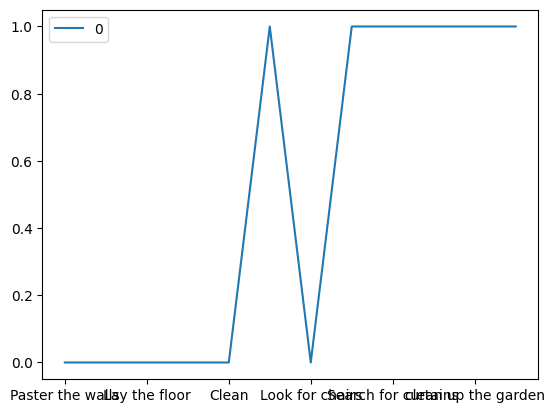

In [65]:
df_binary.plot()
# waardenlijst veranderen naar strings

In [66]:
df_binary.columns

RangeIndex(start=0, stop=1, step=1)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Paster the walls'),
  Text(1, 0, 'Paint'),
  Text(2, 0, 'Lay the floor'),
  Text(3, 0, 'Tidy up'),
  Text(4, 0, 'Clean'),
  Text(5, 0, 'Look for a couch'),
  Text(6, 0, 'Look for chairs'),
  Text(7, 0, 'Find a TV'),
  Text(8, 0, 'Search for curtains'),
  Text(9, 0, 'Look for paintings'),
  Text(10, 0, 'clean up the garden'),
  Text(11, 0, 'Search for garden furniture'),
  Text(12, 0, 'Clean up the front yard'),
  Text(13, 0, 'Find a desk')])

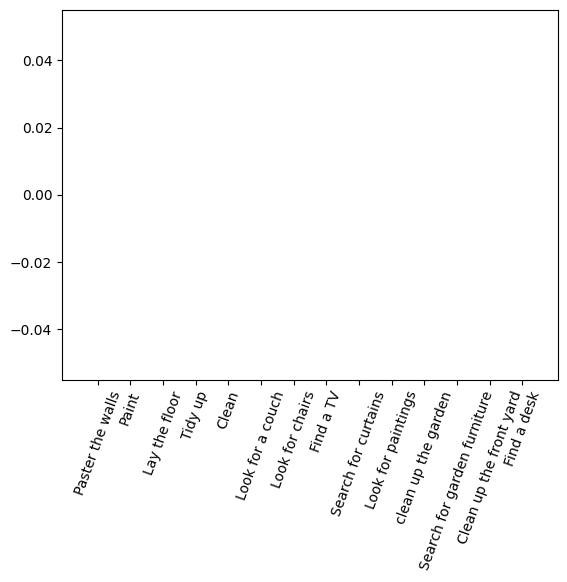

In [67]:
fig, ax = plt.subplots()
ax.bar(waardenlijst, df_binary)

plt.xticks(rotation=70)

# df_binary.plot().set_rotation()

# hoe te maken?

In [68]:
converter_bin = bin(4)
converter_bin

'0b100'

In [69]:
bin(128)

'0b10000000'

In [70]:
def convert_to_bin(number):
    # print(bin(number))
    return bin(number)

In [71]:
convert_to_bin(1)
convert_to_bin(2)
convert_to_bin(4)
convert_to_bin(3)
convert_to_bin(8)

'0b1000'

In [72]:
type(convert_to_bin(8))

str

In [73]:
def clean_bin(bin_output):
    return bin_output[2:]

In [74]:
clean_bin(convert_to_bin(8))

'1000'

In [75]:
def turn_string_around(cleaned_bin):
    return cleaned_bin[::-1]

In [76]:
turn_string_around(clean_bin(convert_to_bin(8)))

'0001'

In [77]:
def make_list_of_string(turned_string_around):
    return list(turned_string_around)

In [78]:
output_van_levens = make_list_of_string("0001")
output_van_levens

['0', '0', '0', '1']

In [79]:
verkregen_elementen = {k: v for k, v in zip(waardenlijst, output_van_levens)}
verkregen_elementen

{'Paster the walls': '0', 'Paint': '0', 'Lay the floor': '0', 'Tidy up': '1'}

In [80]:
print(verkregen_elementen)

{'Paster the walls': '0', 'Paint': '0', 'Lay the floor': '0', 'Tidy up': '1'}


In [81]:
int_list = list(map(int, output_van_levens))
int_list

[0, 0, 0, 1]

# op een andere manier de lijst samen stellen
dit doe ik omdat ik wil proberen een mooie data frame te maken. de waarden zouden de keys moeten worden. iets met "acties" lijst en de output zou "gespaard" moeten zijn.

In [153]:
new_number = convert_to_bin(1000)
clean_new_number = clean_bin(new_number)
turned_string = turn_string_around(clean_new_number)
list_of_bin_strings = make_list_of_string(turned_string)
list_of_bin_strings

['0', '0', '0', '1', '0', '1', '1', '1', '1', '1']

In [ ]:
len_list_of_bin_strings = len(list_of_bin_strings)
dict_for_score = {
    "acties": waardenlijst[:len_list_of_bin_strings],
    "gespaard": list_of_bin_strings,
}
dict_for_score

{'acties': ['Paster the walls',
  'Paint',
  'Lay the floor',
  'Tidy up',
  'Clean',
  'Look for a couch',
  'Look for chairs',
  'Find a TV',
  'Search for curtains',
  'Look for paintings'],
 'gespaard': ['0', '0', '0', '1', '0', '1', '1', '1', '1', '1']}

In [155]:
df_new_binary = pd.DataFrame.from_dict(dict_for_score)
df_new_binary

,acties,gespaard
0,Paster the walls,0
1,Paint,0
2,Lay the floor,0
3,Tidy up,1
4,Clean,0
5,Look for a couch,1
6,Look for chairs,1
7,Find a TV,1
8,Search for curtains,1
9,Look for paintings,1


In [156]:
df_new_binary.tail()

,acties,gespaard
5,Look for a couch,1
6,Look for chairs,1
7,Find a TV,1
8,Search for curtains,1
9,Look for paintings,1


In [157]:
waardenlijst

['Paster the walls',
 'Paint',
 'Lay the floor',
 'Tidy up',
 'Clean',
 'Look for a couch',
 'Look for chairs',
 'Find a TV',
 'Search for curtains',
 'Look for paintings',
 'clean up the garden',
 'Search for garden furniture',
 'Clean up the front yard',
 'Find a desk']

In [158]:
df_new_binary["gespaard"] = df_new_binary["gespaard"].astype("int64")

<Axes: >

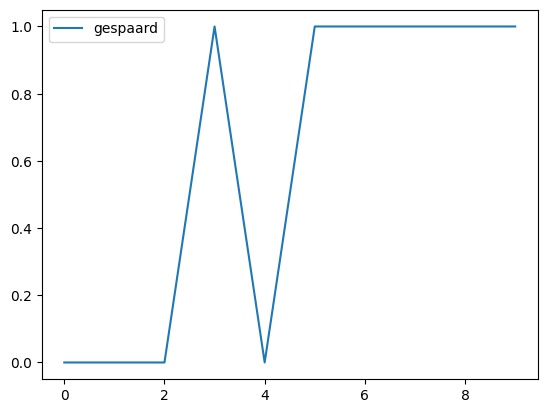

In [159]:
df_new_binary.plot()

In [160]:
len(list_of_bin_strings)

10

In [161]:
len(waardenlijst)

14

In [162]:
waardenlijst[:3]

['Paster the walls', 'Paint', 'Lay the floor']

TypeError: xticks(): Parameter 'labels' can't be set without setting 'ticks'

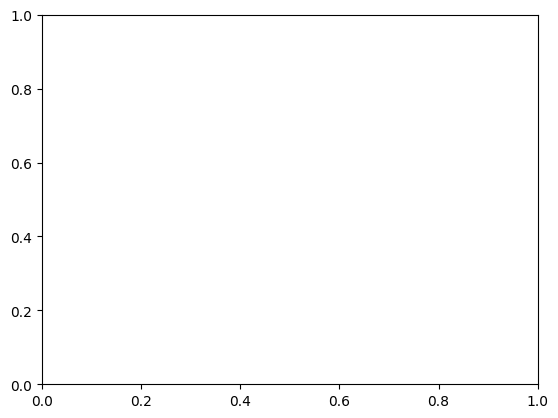

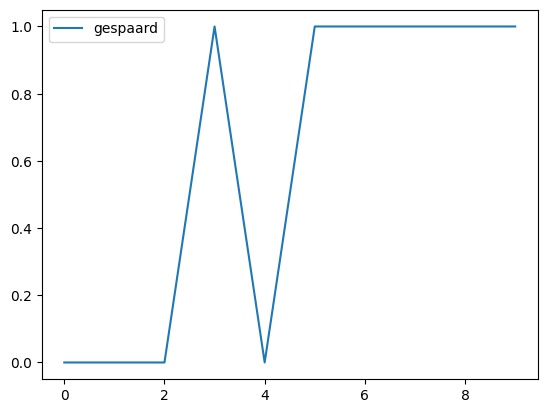

In [163]:
fig, ax = plt.subplots()
df_new_binary.plot()
plt.xticks(rotation=70, labels=waardenlijst[:len_list_of_bin_strings])